<a href="https://colab.research.google.com/github/sunnyiuww/CheckpointDataMining/blob/main/Salinan_dari_CRISP_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analyzing Student Graduation Patterns Based on Influential Factors**

##**Import Library**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan bisnis dari dataset ini adalah memahami faktor-faktor yang mempengaruhi ketepatan mahasiswa dalam menyelesaikan pendidikan mereka dan kemudian mengembangkan strategi intervensi yang sesuai.

##**Assess Situation**

Situasi bisnis yang mendasari analisis dataset ini adalah :



*   Institusi Pendidikan yang mulai memperhatikan tingkat kelulusan dan retensi mahasiswa karena masalah penurunan angka ketepatan kelulusan mahasiswa.
*   Terjadinya peningkatan persaingan antar institusi pendidikan sehingga mereka mulai memperhatikan tingkat ketepatan kelulusan mahasiswa untuk menjaga reputasi dan daya tarik institusi.


*   Institusi pendidikan yang sedang dalam upaya untuk memenuhi standar penjaminan mutu pendidikan yang dimana tingkat kelulusan yang tinggi merupakan indikator kualitas program pendidikan.

##**Data Mining Goals**

Tujuan dari  Data Mining Dataset ini adalah :


*   Mengidentifikasi faktor-faktor yang memiliki pengaruh signifikan terhadap ketepatan kelulusan mahasiswa.
*   Membangun model prediktif yang dapat memperkirakan peluang ketepatan kelulusan mahasiswa berdasarkan faktor-faktor yang telah diidentifikasi.

##**Project Plan**

Rencana proyek untuk menganalisis dataset ini adalah dengan mengidentifikasi dan mengumpulkan dataset yang mencakup informasi tentang mahasiswa, termasuk data akademik (Indeks Prestasi Semester (IPS), Indeks Prestasi Kumulatif (IPK)), data demografis (umur, gender),dan faktor-faktor lain yang berpotensi mempengaruhi ketepatan kelulusan seperti status mahasiswa, status nikah, dan lain-lain. Kemudian memahami karakteristik dataset, mengeksplorasi hubungan antara variabel dan mengidentifikasi pola yang menarik sehingga akan dapat membantu dalam pemahaman awal tentang faktor-faktor yang mempengaruhi ketepatan kelulusan. Langkah selanjutnya adalah membangun model prediktif menggunakan supervised learning, seperti logistic regression atau decision tree. Setelah itu dilakukan implementasi strategi intervensi dan terakhir melakukan pemeliharaan dan evaluasi lanjutan untuk dapat terus meningkatan tingkat ketepatan kelulusuan mahasiswa.

#**Data Understanding**

##**Collect Initial Data**

Dataset yang digunakan untuk membantu dalam melakukan analisis terkait pola kelulusan mahasiswa ini bersumber dari data publik yang diperoleh dari salah satu platfrom yang dapat memungkinkan kita untuk menemukan dan menerbitkan dataset yaitu kaggle, dengan link sebagai berikut
[Dataset Kelulusan](https://www.kaggle.com/datasets/hafizhathallah/kelulusan-mahasiswa)


In [ ]:
df = pd.read_csv('/content/Kelulusan Train.csv')
df.head()

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT


##**Describe Data**

Informasi Dasar

In [ ]:
df.shape

(379, 15)

Dataset ini memiliki 379 baris dengan 15 kolom.

Informasi Lanjutan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              379 non-null    object 
 1   JENIS KELAMIN     379 non-null    object 
 2   STATUS MAHASISWA  379 non-null    object 
 3   UMUR              379 non-null    int64  
 4   STATUS NIKAH      379 non-null    object 
 5   IPS 1             379 non-null    float64
 6   IPS 2             379 non-null    float64
 7   IPS 3             379 non-null    float64
 8   IPS 4             379 non-null    float64
 9   IPS 5             379 non-null    float64
 10  IPS 6             379 non-null    float64
 11  IPS 7             379 non-null    float64
 12  IPS 8             372 non-null    float64
 13  IPK               376 non-null    float64
 14  STATUS KELULUSAN  379 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 44.5+ KB


Kolom-kolom yang ada didalam dataset ini antara lain:


1.  **Nama**, terdiri dari 379 baris dengan tipe data object.
2.  **Jenis Kelamin**, terdiri dari 379 baris dengan tipe data object.
3.  **Status Mahasiswa**, terdiri dari 379 baris dengan tipe data object.
4.  **Umur**, terdiri dari 379 baris dengan tipe data int64.
5.  **Status Nikah**, terdiri dari 379 baris dengan tipe data object.
6.  **IPS 1**, terdiri dari 379 baris dengan tipe data float64.
7.  **IPS 2**, terdiri dari 379 baris dengan tipe data float64.
8.  **IPS 3**, terdiri dari 379 baris dengan tipe data float64.
9.  **IPS 4**, terdiri dari 379 baris dengan tipe data float64.
10. **IPS 5**, terdiri dari 379 baris dengan tipe data float64.
11. **IPS 6**, terdiri dari 379 baris dengan tipe data float64.
12. **IPS 7**, terdiri dari 379 baris dengan tipe data float64.
13. **IPS 8**, terdiri dari 372 baris dengan tipe data float64.
14. **IPK**, terdiri dari 376 baris dengan tipe data float64.
15. **Status Kelulusan**, terdiri dari 379 baris dengan tipe data object.
---
* **Object** : tipe data yang biasanya digunakan untuk menyimpan
string atau kombinasi tipe data lain yang tidak bisa dikelompokkan dalam tipe data numerik
* **Int64** : tipe data yang digunakan untuk menyimpan bilangan bulat.
* **Float64** : tipe data yang digunakan untuk menyimpan angka dengan titik desimal atau floating point.



Informasi Statistik Deskriptif

In [ ]:
df.describe()

,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,372.000000,376.000000
mean,25.955145,2.854116,2.812322,2.900950,2.782137,2.782348,2.877256,2.531240,1.271828,2.933085
std,3.397103,0.412658,0.473725,0.589364,0.648495,0.593472,0.634412,0.757205,1.400914,0.460279
min,22.000000,0.330000,0.500000,0.160000,0.000000,0.200000,0.000000,0.000000,0.000000,0.870000
25%,24.000000,2.600000,2.550000,2.550000,2.460000,2.480000,2.590000,2.150000,0.000000,2.747500
50%,25.000000,2.860000,2.850000,2.980000,2.860000,2.850000,3.000000,2.610000,0.750000,3.010000
75%,27.000000,3.100000,3.105000,3.325000,3.200000,3.205000,3.315000,3.110000,2.750000,3.220000
max,50.000000,3.790000,3.960000,3.960000,3.910000,3.880000,4.000000,3.910000,4.000000,3.850000


Data diatas merupakan hasil statistik deskriptif dari dataset kelulusan mahasiswa dengan penjelasan sebagai berikut :


1.   **Count** : menunjukkan berapa banyak jumlah data yang ada dalam setiap kolom. Dari data diatas diketahui bahwa :
  * Kolom umur dan kolom IPS 1 - IPS 7 meiliki 379 data.
  * Kolom IPS 8 memiliki 372 data.
  * Kolom IPK memiliki 376 data.
2.   **Mean** : menunjukkan rata-rata dari nilai dalam setiap kolom. Dari data diatas diketahui bahwa :
  * Rata-rata umur mahasiswa adalah sekitar 25.95 tahun atau sekitar 25 tahun 11 bulan,
  * Rata-rata IPS 1 mahasiswa sekitar 2.85.
  * Rata-rata IPS 2 mahasiswa sekitar 2.81.
  * Rata-rata IPS 3 mahasiswa sekitar 2.90.
  * Rata-rata IPS 4 mahasiswa sekitar 2.78.
  * Rata-rata IPS 5 mahasiswa sekitar 2.78.
  * Rata-rata IPS 6 mahasiswa sekitar 2.87.
  * Rata-rata IPS 7 mahasiswa sekitar 2.53.
  * Rata-rata IPS 8 mahasiswa sekitar 1.27.
  * Rata-rata IPK mahasiswa sekitar 2.93.
3. **Standard Deviation (std)** : menunjukkan seberapa beragam atau tersebarnya data di sekitar rata-rata. Semakin tinggi standar deviasi, semakin bervariasinya data. Semakin rendah standar deviasi, semakin mendekati nilai rata-rata. Dari data diatas diketahui bahwa :
  * Standar deviasi untuk umur adalah sekitar 3.40, yang berarti umur mahasiswa dalam dataset ini bisa bervariasi cukup banyak dari umur rata-rata mereka, yang sekitar 26 tahun. Jadi, beberapa mahasiswa mungkin lebih tua atau lebih muda dari yang lain dalam dataset ini.
  * Standar deviasi untuk IPS 1 adalah sekitar 0.41, yang berarti bahwa nilai-nilai IPS mahasiswa pada semester pertama tidak terlalu berbeda jauh dari rata-rata.
  * Standar deviasi untuk IPS 2 adalah sekitar 0.47, yang berarti bahwa nilai-nilai IPS mahasiswa pada semester kedua juga tidak terlalu berbeda jauh dari rata-rata.
  * Standar deviasi untuk IPS 3 adalah sekitar 0.58, yang berarti bahwa variasi dalam prestasi mahasiswa sedikit lebih besar, tetapi tidak terlalu signifikan.
  * Standar deviasi untuk IPS 4 adalah sekitar 0.64, yang berarti bahwa ada perbedaan yang cukup signifikan dalam prestasi mahasiswa dikarenakan variasinya lebih besar dari semester sebelumnya.
  * Standar deviasi untuk IPS 5 adalah sekitar 0.59, yang berarti bahwa variasi prestasi mahasiswa hampir sama dengan variasi semester 3.
  * Standar deviasi untuk IPS 6 adalah sekitar 0.63, yang berarti bahwa terdapat perbedaan yang cukup besar dalam prestasi mahasiswa dikarenakann variasinya kembali meningkat.
  * Standar deviasi untuk IPS 7 adalah sekitar 0.75, yang berarti bahwa ada perbedaan yang signifikan dalam prestasi mahasiswa dikarenakan variasinya yang paling besar.
  * Standar deviasi untuk IPS 8 adalah sekitar 1.40, yang berarti bahwa beberapa mahasiswa mungkin memiliki nilai IPS 8 yang jauh di atas atau di bawah rata-rata sehingga menyebabkan variasi yang signifikan dalam prestasi mereka.
  * Standar deviasi untuk IPK adalah sekitar 0.46, yang berarti bahwa prestasi akademik mahasiswa cenderung stabil dan tidak terlalu bervariasi dari semester ke semester. Meskipun ada variasi dalam nilai IPK antara mahasiswa, variasinya tidak terlalu besar, sehingga sebagian besar nilai IPK berada di sekitar nilai rata-rata.
4. **Minimum (min)** : menunjukkan nilai terkecil dalam setiap kolom. Dari data diatas diketahui bahwa :
  * Umur minimum mahasiswa adalah 22 tahun.
  * Nilai minimum IPS 1 adalah 0.33.
  * Nilai minimum IPS 2 adalah 0.50.
  * Nilai minimum IPS 3 adalah 0.16.
  * Nilai minimum IPS 4 adalah 0.00.
  * Nilai minimum IPS 5 adalah 0.20.
  * Nilai minimum IPS 6 adalah 0.00.
  * Nilai minimum IPS 7 adalah 0.00.
  * Nilai minimum IPS 8 adalah 0.00.
  * Nilai minimum IPK adalah 0.87.
5. **25% (Q1, Quartile 1)** : menunjukkan nilai tengah antara nilai terkecil dan median dari kelompok data. Kuartil pertama menjadi penanda bahwa data pada kuartil tersebut berada 25% dari bawah pada kelompok data. Dari data diatas diketahui bahwa :
  * Q1 untuk umur adalah 24 tahun, yang berarti bahwa 25% dari mahasiswa dalam dataset berusia 24 tahun atau lebih muda.
  * Q1 untuk IPS 1 adalah 2.60, yang berarti bahwa 25% dari mahasiswa dalam dataset memiliki IPS 1 sebesar 2.60 atau lebih rendah.
  * Q1 untuk IPS 2 adalah 2.55, yang berarti bahwa 25% dari mahasiswa dalam dataset memiliki IPS 2 sebesar 2.55 atau lebih rendah.
  * Q1 untuk IPS 3 adalah 2.55, yang berarti bahwa 25% dari mahasiswa dalam dataset memiliki IPS 3 sebesar 2.55 atau lebih rendah.
  * Q1 untuk IPS 4 adalah 2.46, yang berarti bahwa 25% dari mahasiswa dalam dataset memiliki IPS 4 sebesar 2.46 atau lebih rendah.
  * Q1 untuk IPS 5 adalah 2.48, yang berarti bahwa 25% dari mahasiswa dalam dataset memiliki IPS 5 sebesar 2.48 atau lebih rendah.
  * Q1 untuk IPS 6 adalah 2.59, yang berarti bahwa 25% dari mahasiswa dalam dataset memiliki IPS 6 sebesar 2.59 atau lebih rendah.
  * Q1 untuk IPS 7 adalah 2.15, yang berarti bahwa 25% dari mahasiswa dalam dataset memiliki IPS 7 sebesar 2.15 atau lebih rendah.
  * Q1 untuk IPS 8 adalah 0.00, yang berarti bahwa 25% dari mahasiswa dalam dataset memiliki IPS 8 sebesar 0.00.
  * Q1 untuk IPK adalah 2.74, yang berarti bahwa 25% dari mahasiswa dalam dataset memiliki IPK sebesar 2.74 atau lebih rendah.
6. **50% (Q2, Median)** : menunjukkan nilai tengah dari data ketika diurutkan dari yang terkecil hingga yang terbesar. Dari data diatas diketahui bahwa :
  * Median dari umur adalah 25 tahun.
  * Median dari IPS 1 adalah 2.86.
  * Median dari IPS 2 adalah 2.85.
  * Median dari IPS 3 adalah 2.98.
  * Median dari IPS 4 adalah 2.86.
  * Median dari IPS 5 adalah 2.85.
  * Median dari IPS 6 adalah 3.00.
  * Median dari IPS 7 adalah 0.75.
  * Median dari IPS 8 adalah 3.01.
7. **75% (Q3, Quartile 3)** : menunjukkan nilai tengah antara median dan nilai tertinggi dari kelompok data. Kuartil ketiga menjadi penanda bahwa data pada kuartil tersebut berada 75% dari bawah pada kelompok data. Dari data diatas diketahui bahwa :
  * Q3 untuk umur adalah 27 tahun, yang berarti bahwa 75% dari mahasiswa dalam dataset berusia 27 tahun atau lebih muda.
  * Q3 untuk IPS 1 adalah 3.10, yang berarti bahwa 75% dari mahasiswa dalam dataset memiliki IPS 1 sebesar 3.10 atau lebih rendah.
  * Q3 untuk IPS 2 adalah 3.10, yang berarti bahwa 75% dari mahasiswa dalam dataset memiliki IPS 2 sebesar 3.10 atau lebih rendah.
  * Q3 untuk IPS 3 adalah 3.32, yang berarti bahwa 75% dari mahasiswa dalam dataset memiliki IPS 3 sebesar 3.32 atau lebih rendah.
  * Q3 untuk IPS 4 adalah 3.20, yang berarti bahwa 75% dari mahasiswa dalam dataset memiliki IPS 4 sebesar 3.20 atau lebih rendah.
  * Q3 untuk IPS 5 adalah 3.20, yang berarti bahwa 75% dari mahasiswa dalam dataset memiliki IPS 5 sebesar 3.20 atau lebih rendah.
  * Q3 untuk IPS 6 adalah 3.31, yang berarti bahwa 75% dari mahasiswa dalam dataset memiliki IPS 6 sebesar 3.31 atau lebih rendah.
  * Q3 untuk IPS 7 adalah 3.11, yang berarti bahwa 75% dari mahasiswa dalam dataset memiliki IPS 7 sebesar 3.11 atau lebih rendah.
  * Q3 untuk IPS 8 adalah 2.75, yang berarti bahwa 75% dari mahasiswa dalam dataset memiliki IPS 8 sebesar 2.75 atau lebih rendah.
  * Q3 untuk IPK adalah 3.22, yang berarti bahwa 75% dari mahasiswa dalam dataset memiliki IPK sebesar 3.22 atau lebih rendah.
8. **Maximum (max)** : menunjukkan nilai terbesar dalam setiap kolom. Dari data diatas diketahui bahwa :
  * Umur maximum mahasiswa adalah 50 tahun.
  * Nilai maximum IPS 1 adalah 3.79.
  * Nilai maximum IPS 2 adalah 3.96.
  * Nilai maximum IPS 3 adalah 3.96.
  * Nilai maximum IPS 4 adalah 3.91.
  * Nilai maximum IPS 5 adalah 3.88.
  * Nilai maximum IPS 6 adalah 4.00.
  * Nilai maximum IPS 7 adalah 3.91.
  * Nilai maximum IPS 8 adalah 4.00.
  * Nilai maximum IPK adalah 3.85.





## **Exploratory Data Analysis**

<Axes: ylabel='JENIS KELAMIN'>

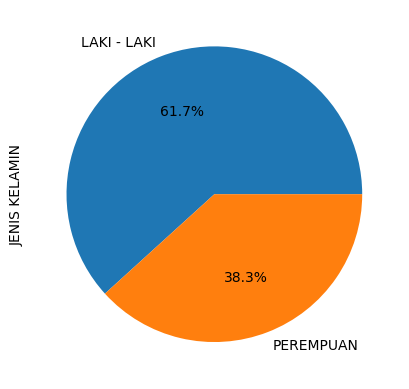

In [ ]:
gender_counts = df['JENIS KELAMIN'].value_counts()
gender_counts.plot(kind = 'pie', autopct='%.1f%%', startangle=360)

Dari visualisasi diatas dapat dilihat bahwa presentase jumlah mahasiswa laki-laki lebih besar dibandingkan dengan presentase jumlah mahasiswa perempuan.

<Axes: ylabel='STATUS MAHASISWA'>

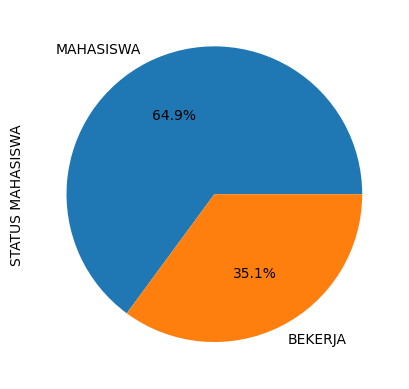

In [ ]:
studentstatus_counts = df['STATUS MAHASISWA'].value_counts()
studentstatus_counts.plot(kind = 'pie', autopct='%.1f%%', startangle=360)

Dari visualisasi diatas dapat dilihat bahwa presentase jumlah mahasiswa yang tidak bekerja atau hanya sebagai mahasiswa lebih besar dibandingkan dengan presentase jumlah mahasiswa yang bekerja.

<Axes: ylabel='STATUS NIKAH'>

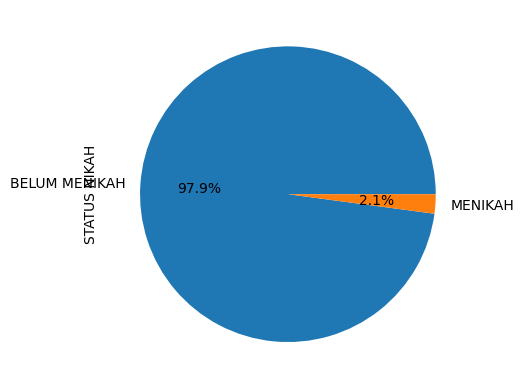

In [ ]:
marriedstatus_counts = df['STATUS NIKAH'].value_counts()
marriedstatus_counts.plot(kind = 'pie', autopct='%.1f%%', startangle=360)

Dari visualisasi diatas dapat dilihat bahwa presentase jumlah mahasiswa yang belum menikah lebih besar dibandingkan dengan presentase jumlah mahasiswa yang sudah menikah.

<Axes: ylabel='STATUS KELULUSAN'>

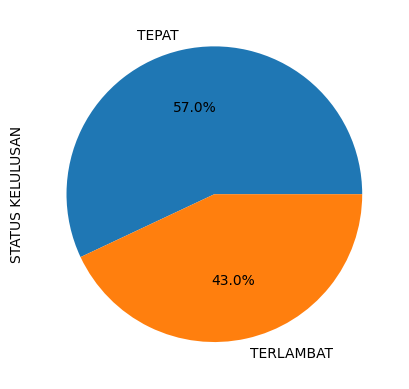

In [ ]:
graduationstatus_counts = df['STATUS KELULUSAN'].value_counts()
graduationstatus_counts.plot(kind = 'pie', autopct='%.1f%%', startangle=360)

Dari visualisasi diatas dapat dilihat bahwa presentase jumlah mahasiswa yang lulus tepat waktu lebih besar dibandingkan dengan presentase jumlah mahasiswa yang terlambat lulus.

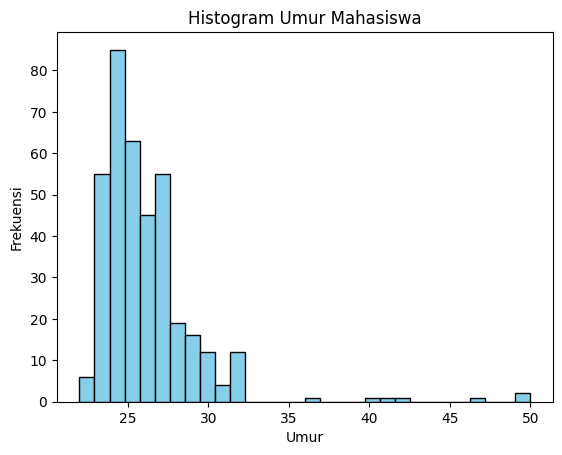

In [ ]:
age = df['UMUR']
plt.hist(age, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram Umur Mahasiswa')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

Dari visualisasi diatas dapat dilihat bahwa mahasiswa dengan umur 20-30an tahun lebih mendominasi dibandingkan mahasiswa dengan umur 30 tahun keatas.

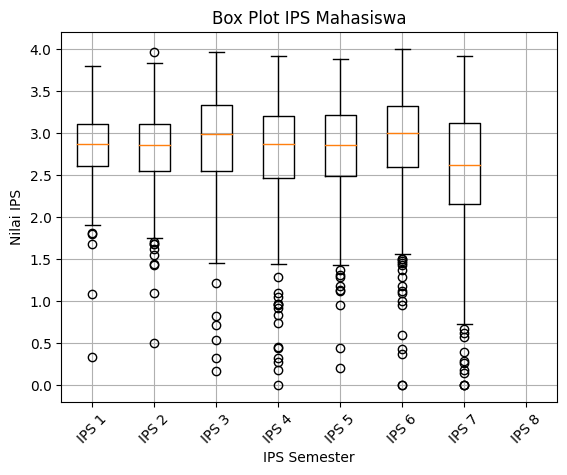

In [ ]:
ips_columns = ['IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8']
ips_data = df[ips_columns]
plt.boxplot(ips_data)
plt.title('Box Plot IPS Mahasiswa')
plt.xlabel('IPS Semester')
plt.ylabel('Nilai IPS')
plt.xticks(range(1, len(ips_columns) + 1), ips_columns, rotation=45)
plt.grid(True)
plt.show()

Visualisai diatas menunjukkan nilai min, 25%, 50%, 75% dan nilai max untuk setiap IPS dari semester 1 hingga semester 7. Berbeda dengan semester lainnya, box plot untuk semester 8 tidak dapat ditampilkan dikarenakan adanya missing values pada kolom IPS 8. 'Bulatan' yang ada pada box plot diatas merepresentasikan outlier/pencilan artinya suatu angka yang memiliki nilai yang sangat berbeda jauh dengan nilai dari angka lainya pada data, angkanya bernilai 3/2 lebih besar dari quartil yang paling atas atau angkanya bernilai 3/2 lebih kecil dari quartil terendah.

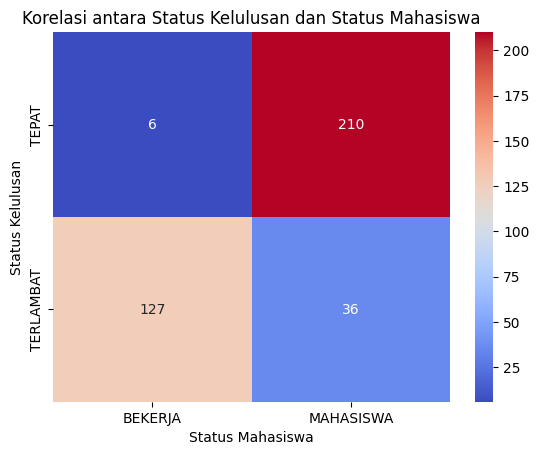

In [ ]:
cross_tab = pd.crosstab(df['STATUS KELULUSAN'], df['STATUS MAHASISWA'])
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d')
plt.title('Korelasi antara Status Kelulusan dan Status Mahasiswa')
plt.xlabel('Status Mahasiswa')
plt.ylabel('Status Kelulusan')
plt.show()

Dari visualisasi diatas dapat dilihat bagaimana status mahasiswa mempengaruhi ketepatan kelulusan mahasiswa. Visualisasi diatas menunjukkan bahwa mahasiswa yang bekerja cenderung memiliki tingkat ketepatan kelulusan yang lebih rendah daripada mereka yang tidak bekerja, hal ini menunjukkan korelasi negatif antara status mahasiswa dan status ketepatan kelulusan.

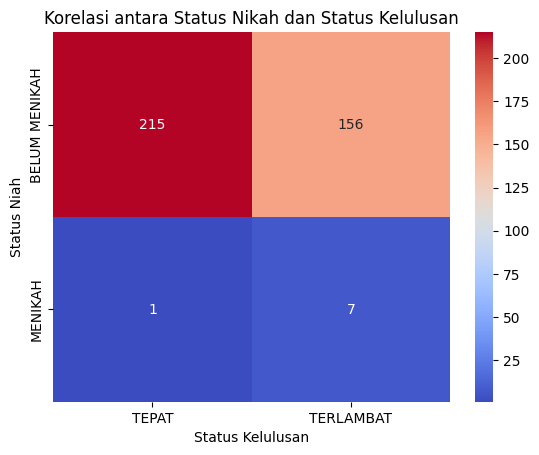

In [ ]:
contingency_table = pd.crosstab(df['STATUS NIKAH'], df['STATUS KELULUSAN'])
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Korelasi antara Status Nikah dan Status Kelulusan')
plt.xlabel('Status Kelulusan')
plt.ylabel('Status Niah')
plt.show()

Dari visualisasi diatas dapat dilihat bagaimana status nikah mempengaruhi ketepatan kelulusan mahasiswa. Visualisasi diatas menunjukkan bahwa mahasiswa yang sudah menikah cenderung memiliki tingkat ketepatan kelulusan yang lebih rendah daripada mereka yang belum menikah, hal ini menunjukkan korelasi negatif antara status nikah dan status ketepatan kelulusan.

In [ ]:
df.corr('pearson')

<ipython-input-15-8186c819ea6c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr('pearson')


,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK
UMUR,1.000000,-0.059710,-0.064277,-0.093807,-0.099796,-0.115460,-0.026510,-0.017843,-0.144455,-0.068305
IPS 1,-0.059710,1.000000,0.542508,0.619559,0.548783,0.562376,0.455440,0.265457,-0.127942,0.550760
IPS 2,-0.064277,0.542508,1.000000,0.592504,0.704234,0.691604,0.586625,0.463600,0.082878,0.660889
IPS 3,-0.093807,0.619559,0.592504,1.000000,0.697840,0.679137,0.578426,0.313085,-0.098770,0.688177
IPS 4,-0.099796,0.548783,0.704234,0.697840,1.000000,0.798534,0.721468,0.513300,0.077292,0.741087
IPS 5,-0.115460,0.562376,0.691604,0.679137,0.798534,1.000000,0.674647,0.468240,0.042657,0.742654
IPS 6,-0.026510,0.455440,0.586625,0.578426,0.721468,0.674647,1.000000,0.584579,0.046115,0.682735
IPS 7,-0.017843,0.265457,0.463600,0.313085,0.513300,0.468240,0.584579,1.000000,0.107333,0.539326
IPS 8,-0.144455,-0.127942,0.082878,-0.098770,0.077292,0.042657,0.046115,0.107333,1.000000,0.080964
IPK,-0.068305,0.550760,0.660889,0.688177,0.741087,0.742654,0.682735,0.539326,0.080964,1.000000


Data diatas menunjukkan :
* Korelasi antara umur dan variabel lainnya tampaknya cukup rendah (semua nilai korelasi mendekati 0 atau negatif kecil), menunjukkan tidak ada hubungan linier yang signifikan antara umur dan variabel lainnya.
* Korelasi antara variabel 'IPS 1' hingga 'IPS 8' dengan 'IPK' cukup tinggi, dengan nilai korelasi berkisar antara 0.54 hingga 0.74. Ini menunjukkan adanya hubungan linier yang kuat antara nilai-nilai IPS dan IPK, yang berarti semakin tinggi nilai IPS, semakin tinggi juga kemungkinan IPK mahasiswa.
* Korelasi antara 'IPS 8' dengan variabel lainnya juga relatif rendah, menunjukkan bahwa 'IPS 8' memiliki hubungan yang lebih rendah dengan variabel lainnya dibandingkan dengan hubungan antara 'IPS 1' hingga 'IPS 7' dengan variabel lainnya.

## **Verify Data Quality**

Missing Values

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
NAMA,0.000000
JENIS KELAMIN,0.000000
STATUS MAHASISWA,0.000000
UMUR,0.000000
STATUS NIKAH,0.000000
IPS 1,0.000000
IPS 2,0.000000
IPS 3,0.000000
IPS 4,0.000000
IPS 5,0.000000


Dari data diatas dapat dilihat bahwa pada kolom IPS 8 terdapat missing values dengan rasio 1.84 dan juga pada kolom IPK dengan rasio 0.79. Sisa kolom lainnya seperti kolom nama, jenis kelamin, umur, status nikah, IPS 1-7 dan kolom status kelulusan tidak memiliki missing values.

Outliers Values

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
UMUR,5.013193
IPS 1,1.319261
IPS 2,2.638522
IPS 3,1.583113
IPS 4,3.957784
IPS 5,2.374670
IPS 6,4.485488
IPS 7,2.902375
IPS 8,0.000000
IPK,4.221636


Data diatas menunjukkan :
* UMUR: 5.01% dari total data dalam kolom UMUR diidentifikasi sebagai outliers. Ini mungkin mencerminkan kasus-kasus di mana usia mahasiswa berada di luar rentang yang diharapkan, seperti mahasiswa yang lebih tua dari rata-rata.

* IPS 1-7: Persentase outliers untuk setiap IPS (Indeks Prestasi Semester) berkisar antara 1.32% hingga 4.49%. Hal ini menunjukkan bahwa terdapat variasi yang signifikan dalam kinerja akademik mahasiswa pada setiap semester, dengan sejumlah kecil mahasiswa memiliki nilai yang jauh berbeda dari mayoritas.

* IPS 8: Tidak ada outlier yang terdeteksi dalam kolom IPS 8. Ini mungkin disebabkan oleh struktur data yang berbeda atau karakteristik dari IPS 8 dibandingkan dengan IPS 1-7.

* IPK: 4.22% dari total data dalam kolom IPK diidentifikasi sebagai outliers. Ini menunjukkan adanya variasi yang signifikan dalam IPK mahasiswa, dengan sejumlah kecil mahasiswa memiliki IPK yang jauh berbeda dari mayoritas.

Duplicated Values

In [ ]:
df[df.duplicated()]

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN


Berdasarkan hasil data analisis sementara dapat ditarik kesimpulan bahwa data tersebut memiliki kualitas yang baik dikarenakan hanya ada sedikit data yang kosong dan tidak ada data yang terduplikasi.

#**DATA PREPARATION**

###**Penanganan Missing Values**

#####**Pengecekkan Missing Values**

In [ ]:
print((df.isna().sum() / len(df)) * 100)

NAMA                0.000000
JENIS KELAMIN       0.000000
STATUS MAHASISWA    0.000000
UMUR                0.000000
STATUS NIKAH        0.000000
IPS 1               0.000000
IPS 2               0.000000
IPS 3               0.000000
IPS 4               0.000000
IPS 5               0.000000
IPS 6               0.000000
IPS 7               0.000000
IPS 8               1.846966
IPK                 0.791557
STATUS KELULUSAN    0.000000
dtype: float64


Output diatas merupakan presentase dari missing values yang ada didalam dataset. Dari output diatas dapat dilihat bahwa terdapat 1.846966% missing values pada kolom IPS8 dan 0.791557% missing values pada kolom IPK. Output ini sendiri akan sangat membantu dalam menentukan langkah selanjutnya seperti pengisian nilai yang hilang atau penghapusan baris atau kolom yang memiliki terlalu banyak nilai yang hilang

Nilai kosong pada IPS 8

In [ ]:
df[df['IPS 8'].isnull()]

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
19,ANDI HARDIANTO,LAKI - LAKI,MAHASISWA,27,BELUM MENIKAH,3.10,3.71,2.96,3.40,3.40,3.61,3.73,NaN,3.38,TEPAT
128,NOOR FAIS,PEREMPUAN,MAHASISWA,25,BELUM MENIKAH,2.21,2.03,0.82,0.45,1.28,0.43,0.39,NaN,1.36,TEPAT
212,ARIS SETYAWAN,LAKI - LAKI,MAHASISWA,24,BELUM MENIKAH,3.10,2.80,3.25,2.43,2.50,2.70,0.17,NaN,2.53,TEPAT
235,LEYLA TRIYANA PRATIWI,PEREMPUAN,MAHASISWA,26,BELUM MENIKAH,3.60,3.50,3.42,2.85,3.31,2.95,2.18,NaN,3.39,TEPAT
250,DEVI KISTIANI,PEREMPUAN,MAHASISWA,25,BELUM MENIKAH,3.52,3.46,3.69,3.41,3.40,0.00,0.00,NaN,3.43,TEPAT
260,AHMAD FIRDAUS MABRURI,LAKI - LAKI,MAHASISWA,25,BELUM MENIKAH,2.33,3.00,2.19,0.44,2.17,0.59,0.26,NaN,1.72,TEPAT
271,IVANDHY SETYARACHMAN,LAKI - LAKI,MAHASISWA,31,BELUM MENIKAH,2.86,2.98,3.39,3.27,2.98,2.85,2.12,NaN,3.21,TEPAT


Data diatas menunjukkan beberapa baris dalam dataset yang memiliki missing values di kolom IPS 8.

Nilai kosong pada IPK

In [ ]:
df[df['IPK '].isnull()]

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
333,YUIKE WIJAYANTI,PEREMPUAN,MAHASISWA,24,BELUM MENIKAH,2.55,3.07,2.68,3.00,3.25,3.08,3.18,0.0,NaN,TEPAT
336,MUSTAANUN NA'IM,LAKI - LAKI,MAHASISWA,23,BELUM MENIKAH,3.05,3.19,3.52,3.57,3.25,3.79,2.50,4.0,NaN,TEPAT
346,FITRI KOMALASARI,PEREMPUAN,MAHASISWA,26,BELUM MENIKAH,2.79,3.09,3.08,2.96,2.59,3.19,3.38,3.0,NaN,TEPAT


Data diatas menunjukkan beberapa baris dalam dataset yang memiliki missing values di kolom IPK.

#####**Imputasi Missing Values**

Kolom IPS 8

In [ ]:
df['IPS 8'].dropna().describe()

count    372.000000
mean       1.271828
std        1.400914
min        0.000000
25%        0.000000
50%        0.750000
75%        2.750000
max        4.000000
Name: IPS 8, dtype: float64

Karena kolom IPS 8 merupakan fitur yang relevan dengan analisis ini dan presentase missing values-nya <70%, maka akan dilakukan imputasi missing values atau pengisian nilai yang hilang dalam dataset.

In [ ]:
df['IPS 8'] = df['IPS 8'].fillna(df['IPS 8'].dropna().median())

Bedasarkan hasil analisis sebelumnya, kita dapat menggunakan nilai median untuk imputasi nilai kosong. Penggunaan nilai median ini dinilai lebih optimal dibandingkan dengan penggunaan nilai mean, karena menggunakan nilai median akan lebih tahan terhadap pengaruh dari nilai-nilai yang ekstrem atau outlier, yang mungkin dapat ditemui dalam distribusi yang condong ke kanan seperti ini.

Kolom IPK

In [ ]:
df['IPK '].dropna().describe()

count    376.000000
mean       2.933085
std        0.460279
min        0.870000
25%        2.747500
50%        3.010000
75%        3.220000
max        3.850000
Name: IPK , dtype: float64

Sama hal nya dengan kolom IPS 8, pada kolom IPK ini akan dilakukan imputasi missing values atau pengisian nilai yang hilang dalam dataset karena kolom ini merupakan fitur yang relevan dengan analisis ini dan presentase missing values-nya <70%.

In [ ]:
df['IPK '] = df['IPK '].fillna(df['IPK '].dropna().mean())

Bedasarkan hasil analisis sebelumnya, kita dapat menggunakan nilai mean untuk imputasi nilai kosong karena distribusi data IPK cenderung simetris atau mendekati distribusi normal.

#####**Pengecekkan Ulang**

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
NAMA,0.0
JENIS KELAMIN,0.0
STATUS MAHASISWA,0.0
UMUR,0.0
STATUS NIKAH,0.0
IPS 1,0.0
IPS 2,0.0
IPS 3,0.0
IPS 4,0.0
IPS 5,0.0


Secara keseluruhan, persentase nilai yang hilang untuk setiap kolom adalah nol (0%). Ini menunjukkan bahwa dataset ini sudah lengkap, tidak ada nilai yang hilang dalam dataset tersebut.

###**Penanganan Duplicated Values**

#####**Pengecekkan Nilai Duplikat**

In [ ]:
df[df.duplicated()]

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN


Output diatas menunjukkan bahwa tidak ada nilai duplikasi dalam dataset ini.

###**Penanganan Outliers**

#####**Pengecekkan Outliers**

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
UMUR,5.013193
IPS 1,1.319261
IPS 2,2.638522
IPS 3,1.583113
IPS 4,3.957784
IPS 5,2.374670
IPS 6,4.485488
IPS 7,2.902375
IPS 8,0.000000
IPK,4.221636


Dari persentase outliers ini, dapat disimpulkan bahwa kolom UMUR, IPS 4, IPS 6, dan IPK memiliki persentase outliers yang relatif tinggi, dengan persentase di atas 4%. Ini menunjukkan bahwa ada sejumlah besar data di kolom-kolom ini yang berada jauh dari kisaran nilai yang diharapkan atau memiliki distribusi yang tidak biasa.
Sementara itu, kolom IPS 8 tidak memiliki outliers, yang menunjukkan bahwa data di kolom ini relatif homogen atau tidak ada data yang terlalu jauh dari nilai-nilai yang umum.

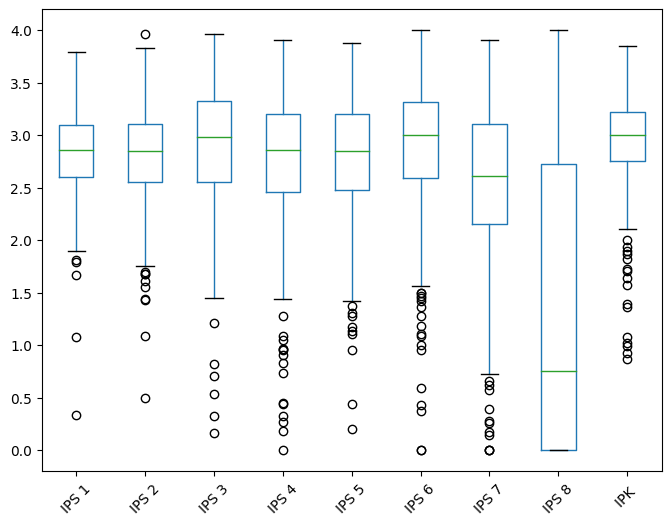

In [ ]:
boxplot = df.drop('UMUR', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

Gambar diatas merepresentasikan persebaran atau distribusi data pada setiap kolomnya.

#####**Hapus Outliers**

Melakukan penghapusan baris pada kolom IPS 1-8 dan kolom IPK untuk menanganani outliers

In [ ]:
# Menghitung IQR dan batas bawah serta batas atas untuk setiap kolom 'IPS' dan 'IPK'
Q1_ips = df[['IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8']].quantile(0.25)
Q3_ips = df[['IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8']].quantile(0.75)
IQR_ips = Q3_ips - Q1_ips
lower_bound_ips = Q1_ips - 1.5 * IQR_ips
upper_bound_ips = Q3_ips + 1.5 * IQR_ips

Q1_ipk = df['IPK '].quantile(0.25)
Q3_ipk = df['IPK '].quantile(0.75)
IQR_ipk = Q3_ipk - Q1_ipk
lower_bound_ipk = Q1_ipk - 1.5 * IQR_ipk
upper_bound_ipk = Q3_ipk + 1.5 * IQR_ipk

# Menghapus baris-baris yang berada di luar rentang IQR untuk setiap kolom 'IPS' dan 'IPK'
df = df[(df[['IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8']] >= lower_bound_ips).all(axis=1) &
        (df[['IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8']] <= upper_bound_ips).all(axis=1) &
        (df['IPK '] >= lower_bound_ipk) & (df['IPK '] <= upper_bound_ipk)]

#####**Imputasi Outliers**

Imputasi outliers ini tidak dilakukan karena presentase outliers untuk semua kolomnya <= 10% sehingga yang dilakukan adalah penghapusan baris.

#####**Pengecekkan Ulang**

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
UMUR,4.970760
IPS 1,0.000000
IPS 2,0.292398
IPS 3,0.000000
IPS 4,0.292398
IPS 5,0.292398
IPS 6,1.169591
IPS 7,0.292398
IPS 8,0.000000
IPK,2.046784


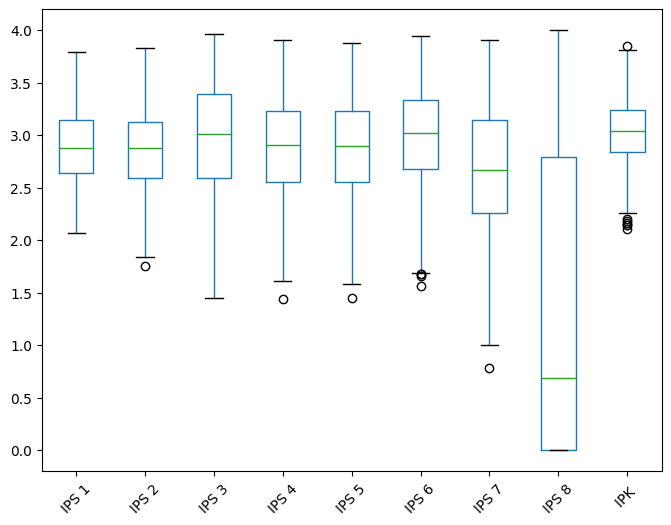

In [ ]:
boxplot = df.drop('UMUR', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

Hasil analisis dan box plot diatas menggambarkan persebaran atau distribusi data setelah dilakukan penghapusan outliers.

#**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

In [ ]:
def Predicate_Category(IPK):
    if 3.5 <= IPK < 3.8:
        return 'Cumlaude'
    elif 3.8 <= IPK < 3.99:
        return 'Magna Cumlaude'
    elif IPK >= 4.0:
        return 'Summa Cumlaude'
    else:
        return 'Non-Cumlaude'

# Mengecek apakah kolom 'PredicateCategory' sudah ada dalam DataFrame
if 'PredicateCategory' not in df.columns:
    df['PredicateCategory'] = df['IPK '].apply(Predicate_Category)

Disini kita dapat menambahkan fitur baru untuk memberikan predikat kepada mahasiswa sesuai dengan kriteria.

###**Pengecekkan Hasil**

In [ ]:
df.head()

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN,PredicateCategory
0,ANIK WIDAYANTI,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT,Non-Cumlaude
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT,Non-Cumlaude
2,MURYA ARIEF BASUKI,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT,Cumlaude
3,NANIK SUSANTI,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT,Non-Cumlaude
4,RIFKA ISTIQFARINA,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT,Non-Cumlaude


Fitur baru yang ditambahkan berupa fitur kategori predikat yang dimana fitur ini mengkategorikan mahasiswa berdasarkan IPK mereka. Untuk kategorinya tebagi menjadi 4 yaitu cumlaude, magna cumlaude, summa cumlaudue dan non-cumlaudue.

#**Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [ ]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [ ]:
df = df.drop(['NAMA','UMUR','JENIS KELAMIN'], axis=1)

###**Pengecekkan Hasil**

In [ ]:
df.head()

,STATUS MAHASISWA,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN,PredicateCategory
0,BEKERJA,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT,Non-Cumlaude
1,MAHASISWA,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT,Non-Cumlaude
2,BEKERJA,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT,Cumlaude
3,MAHASISWA,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT,Non-Cumlaude
4,BEKERJA,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT,Non-Cumlaude


Tujuan dari data reduction ini adalah untuk mengurangi fitur-fitur atau kolom yang kurang relevan dalam analisis data. Disini ada beberapa fitur atau kolom yang dihapus yaitu kolom nama, umur dan jenis kelamin. Alasan fitur ini dihapus adalah karenna fitur ini kurang relevan dan tidak memiliki pengaruh yang signifikan dalam analisis ketepatan kelulusan mahasiswa.

#**Data Transformation**

###**Mapping**

In [ ]:
# Ubah kolom 'STATUS MAHASISWA'
df['STATUS MAHASISWA'] = df['STATUS MAHASISWA'].map({'MAHASISWA': 1, 'BEKERJA': 0})

# Ubah kolom 'STATUS NIKAH'
df['STATUS NIKAH'] = df['STATUS NIKAH'].map({'BELUM MENIKAH': 0, 'MENIKAH': 1})

# Ubah kolom 'STATUS KELULUSAN'
df['STATUS KELULUSAN'] = df['STATUS KELULUSAN'].map({'TERLAMBAT': 0, 'TEPAT': 1})

# Ubah kolom 'PredicateCategory'
df['PredicateCategory'] = df['PredicateCategory'].map({'Cumlaude': 0, 'Magna Cumlaude': 1, 'Summa Cumlaude': 2, 'Non-Cumlaude': 3})

In [ ]:
df

,STATUS MAHASISWA,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN,PredicateCategory
0,0,0,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,0,3
1,1,0,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,0,3
2,0,0,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,0,0
3,1,0,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,0,3
4,0,0,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,1,0,2.29,2.89,2.48,3.14,2.90,2.40,2.73,0.0,2.85,1,3
375,0,0,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,2.97,1,3
376,1,0,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,3.03,1,3
377,1,0,3.02,2.94,3.25,2.87,3.00,2.94,3.09,3.0,3.16,1,3


Mapping ini digunakan untuk mengubah atau mentransformasikan data label teks menjadi data dengan kode angka. Contohnya pada kolom status kelulusan, dari yang sebelumnya 'TERLAMBAT' diubah menjadi 0 dan 'TEPAT' diubah menjadi 1.

###**Encoding**

In [ ]:
df = pd.get_dummies(df)

###**Pengecekkan Hasil**

In [ ]:
df.head()

,STATUS MAHASISWA,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN,PredicateCategory
0,0,0,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,0,3
1,1,0,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,0,3
2,0,0,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,0,0
3,1,0,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,0,3
4,0,0,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,0,3


Teknik encoding diatas merupakan teknik one-hot encoding yang dimana teknik ini bertujuan untuk mengubah variabel kategori dalam dataframe menjadi bentuk biner yang dapat dipahami oleh model machine learning atau algoritma analisis data lainnya. Dengan melakukan one-hot encoding, kita dapat menyederhanakan representasi data kategori dan memungkinkan model untuk bekerja dengan lebih baik dengan data tersebut.

#**MODELLING**

**Library untuk Splitting Data**

In [ ]:
from sklearn.model_selection import train_test_split

**Library untuk Normalisasi Data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

**Library Untuk Build Model**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import accuracy_score

#**Modelling Predict**

###**Pre-Processing**

#####**Split Data**

In [ ]:
x = df.drop('STATUS KELULUSAN', axis=1)
y = df['STATUS KELULUSAN']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Split data bertujuan untuk mempersiapkan data yang akan digunakan dalam proses pemodelan. Data dipisahkan menjadi dua bagian: data fitur (variabel independen) yang disimpan dalam variabel x, dan data target (variabel dependen) yang disimpan dalam variabel y. Selanjutnya, data tersebut dibagi lagi menjadi data latih dan data uji menggunakan metode train-test split. Data latih akan digunakan untuk melatih model, sedangkan data uji akan digunakan untuk menguji kinerja model yang telah dilatih.

#####**Normalisasi Data**

In [ ]:
scaler = MinMaxScaler()

x_train_norm = scaler.fit_transform(x_train)

x_test_norm = scaler.transform(x_test)

Normalisasi data ini bertujuan untuk melakukan penskalaan pada data fitur dalam dataset menggunakan metode yang disebut Min-Max Scaler. Penskalaan ini dilakukan untuk memastikan bahwa semua fitur dalam dataset memiliki nilai yang seimbang dan berada dalam rentang yang sama, yaitu antara 0 dan 1. Proses penskalaan ini membantu agar perbedaan skala antar fitur tidak terlalu besar, sehingga model machine learning dapat belajar dengan lebih baik dan memberikan prediksi yang lebih akurat.

###**Build and Train Model**

#####**Gaussian Naive Bayes**

In [ ]:
gnb = GaussianNB()

gnb.fit(x_train_norm, y_train)

GaussianNB()

Proses ini melibatkan pembuatan model Gaussian Naive Bayes yang kemudian dilatih menggunakan data latih yang telah dinormalisasi. Latihan ini bertujuan untuk mengatur model agar dapat mengenali pola-pola dalam data. Setelah proses pelatihan selesai, model tersebut akan siap digunakan untuk melakukan prediksi terhadap data baru yang belum pernah dilihat sebelumnya.

#####**K-Nearest Neighbor**

In [ ]:
knn = KNeighborsClassifier()

knn.fit(x_train_norm, y_train)

KNeighborsClassifier()

Proses ini melibatkan pembuatan model K-Nearest Neighbors (KNN) yang kemudian dilatih menggunakan data latih yang telah dinormalisasi. Latihan ini bertujuan untuk mengatur model agar dapat mengenali pola-pola dalam data. Setelah proses pelatihan selesai, model tersebut akan siap digunakan untuk melakukan prediksi terhadap data baru yang belum pernah dilihat sebelumnya.

#####**Decision Tree**

In [ ]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train_norm, y_train)

DecisionTreeClassifier()

Proses ini melibatkan pembuatan model Decision Tree Classifier (DTC) yang kemudian dilatih menggunakan data latih yang telah dinormalisasi. Latihan ini bertujuan untuk mengatur model agar dapat mengenali pola-pola dalam data. Setelah proses pelatihan selesai, model tersebut akan siap digunakan untuk melakukan prediksi terhadap data baru yang belum pernah dilihat sebelumnya.

###**Begins and Compare Predict**

In [ ]:
gnb_pred = gnb.predict(x_test_norm)
knn_pred = knn.predict(x_test_norm)
dtc_pred = dtc.predict(x_test_norm)

In [ ]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])

combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)

In [ ]:
combined_data.sample(10)

,STATUS MAHASISWA,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,PredicateCategory,STATUS KELULUSAN,gnb_prediction,knn_prediction,dtc_prediction
84,1,0,3.24,2.83,3.50,2.67,2.98,2.50,1.67,0.00,2.89,3,1,1,1,1
20,0,0,2.69,2.58,3.02,3.08,3.38,3.12,2.68,0.00,3.15,3,0,0,0,0
62,1,0,3.29,3.31,2.88,3.36,3.02,3.39,3.31,0.00,3.32,3,1,1,1,0
60,1,0,2.52,3.30,3.79,3.71,3.65,2.10,3.59,4.00,3.52,0,1,1,1,0
44,0,0,3.26,3.73,3.02,3.50,2.69,3.33,3.09,3.50,3.24,3,1,1,0,0
85,0,0,2.67,2.20,1.45,3.00,3.17,3.08,3.33,0.00,2.95,3,0,0,0,1
16,0,0,2.69,2.36,3.23,3.25,2.88,3.47,2.95,0.00,3.12,3,0,0,0,0
89,1,0,3.17,2.70,3.23,2.41,3.00,2.47,1.75,0.00,2.75,3,1,1,1,1
65,0,0,2.55,2.30,2.02,2.32,2.05,2.95,2.64,1.46,2.63,3,0,0,0,0
78,1,0,2.90,3.07,2.44,2.41,2.40,2.75,2.08,2.80,3.13,3,1,1,1,0


Dari hasil analisis diatas, dapat dilihat bahwa nilai dari ketiga kolom algoritma prediksi (gnb_prediction, knn_prediction, dan dtc_prediction) sebagian besar sama untuk suatu baris dalam dataset, itu berarti bahwa ketiga algoritma klasifikasi memberikan prediksi yang seragam atau konsisten terhadap status kelulusan mahasiswa tersebut, baik itu lulus tepat waktu atau terlambat.
Dalam konteks ini, konsistensi prediksi dari ketiga algoritma menunjukkan bahwa meskipun ada perbedaan teknik dan pendekatan di balik masing-masing algoritma, semuanya menyimpulkan bahwa mahasiswa pada baris tersebut akan lulus tepat waktu atau terlambat dengan status yang sama.

#**EVALUATION**

###**Perhitungan Matriks - Matriks Evaluasi dan Metrik Pengukuran**

In [ ]:
from sklearn.metrics import classification_report

# Menampilkan Classification Report untuk Gaussian Naive Bayes
print("Classification Report for Gaussian Naive Bayes:")
print(classification_report(y_test, gnb_pred))

# Menampilkan Classification Report untuk K-Nearest Neighbor
print("\nClassification Report for K-Nearest Neighbor:")
print(classification_report(y_test, knn_pred))

# Menampilkan Classification Report untuk Decision Tree Classifier
print("\nClassification Report for Decision Tree Classifier:")
print(classification_report(y_test, dtc_pred))


Classification Report for Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.97      0.65      0.78        43
           1       0.80      0.98      0.88        60

    accuracy                           0.84       103
   macro avg       0.88      0.82      0.83       103
weighted avg       0.87      0.84      0.84       103


Classification Report for K-Nearest Neighbor:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        43
           1       0.86      0.95      0.90        60

    accuracy                           0.88       103
   macro avg       0.89      0.87      0.88       103
weighted avg       0.89      0.88      0.88       103


Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75        43
           1       0.82      0.83      0.83        60

    accuracy                      

Berdasarkan hasil classification report yang diberikan untuk setiap model, kita dapat mengevaluasi kinerja masing-masing model klasifikasi (Gaussian Naive Bayes, K-Nearest Neighbors, dan Decision Tree Classifier) dalam memprediksi kelas target (STATUS KELULUSAN).

1. **Gaussian Naive Bayes**:
   - Precision: Model memiliki precision sebesar 0.97 untuk kelas 0 dan 0.80 untuk kelas 1. Ini menunjukkan bahwa model cenderung memberikan prediksi yang sangat akurat untuk kelas 0, tetapi sedikit lebih rendah untuk kelas 1.
   - Recall: Recall untuk kelas 0 adalah 0.65, sedangkan untuk kelas 1 adalah 0.98. Ini mengindikasikan bahwa model cenderung mengidentifikasi sebagian besar instance positif (kelas 1), tetapi memiliki kinerja yang lebih rendah dalam mengenali instance negatif (kelas 0).
   - F1-Score: F1-score untuk kelas 0 adalah 0.78, sedangkan untuk kelas 1 adalah 0.88. F1-score yang tinggi menunjukkan keseimbangan yang baik antara precision dan recall untuk masing-masing kelas.
   - Accuracy: Akurasi model adalah 0.84, yang menunjukkan bahwa model secara keseluruhan dapat mengklasifikasikan sekitar 84% dari data uji dengan benar.

2. **K-Nearest Neighbors (KNN)**:
   - Precision: Model memiliki precision sebesar 0.92 untuk kelas 0 dan 0.86 untuk kelas 1. Ini menunjukkan kinerja yang baik untuk kedua kelas.
   - Recall: Recall untuk kelas 0 adalah 0.79, sedangkan untuk kelas 1 adalah 0.95. Ini menunjukkan bahwa model memiliki kemampuan yang baik dalam mengidentifikasi kedua kelas.
   - F1-Score: F1-score untuk kelas 0 adalah 0.85, sedangkan untuk kelas 1 adalah 0.90. F1-score yang tinggi menunjukkan keseimbangan yang baik antara precision dan recall untuk masing-masing kelas.
   - Accuracy: Akurasi model adalah 0.88, yang menunjukkan bahwa model secara keseluruhan dapat mengklasifikasikan sekitar 88% dari data uji dengan benar.

3. **Decision Tree Classifier (DTC)**:
   - Precision: Model memiliki precision sebesar 0.76 untuk kelas 0 dan 0.82 untuk kelas 1. Ini menunjukkan bahwa model memiliki kinerja yang lebih rendah dalam mengklasifikasikan kelas 0 dibandingkan dengan kelas 1.
   - Recall: Recall untuk kelas 0 adalah 0.74, sedangkan untuk kelas 1 adalah 0.83. Ini menunjukkan bahwa model memiliki kemampuan yang baik dalam mengidentifikasi kelas 1, tetapi lebih rendah dalam mengidentifikasi kelas 0.
   - F1-Score: F1-score untuk kelas 0 adalah 0.75, sedangkan untuk kelas 1 adalah 0.83. F1-score yang lebih rendah untuk kelas 0 menunjukkan bahwa keseimbangan antara precision dan recall kurang optimal untuk kelas ini.
   - Accuracy: Akurasi model adalah 0.80, yang menunjukkan bahwa model secara keseluruhan dapat mengklasifikasikan sekitar 80% dari data uji dengan benar.

Berdasarkan hasil analisis ini, kita dapat mengevaluasi dan membandingkan kinerja ketiga model dalam memprediksi status kelulusan. KNN memiliki kinerja yang paling baik dengan akurasi tertinggi dan nilai precision, recall, dan f1-score yang seimbang untuk kedua kelas. Sedangkan Gaussian Naive Bayes memiliki akurasi yang cukup baik, tetapi sedikit lebih rendah daripada KNN, sementara Decision Tree Classifier memiliki kinerja yang paling rendah di antara ketiganya.

###**Evaluation Result**

####**Interpretasi Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

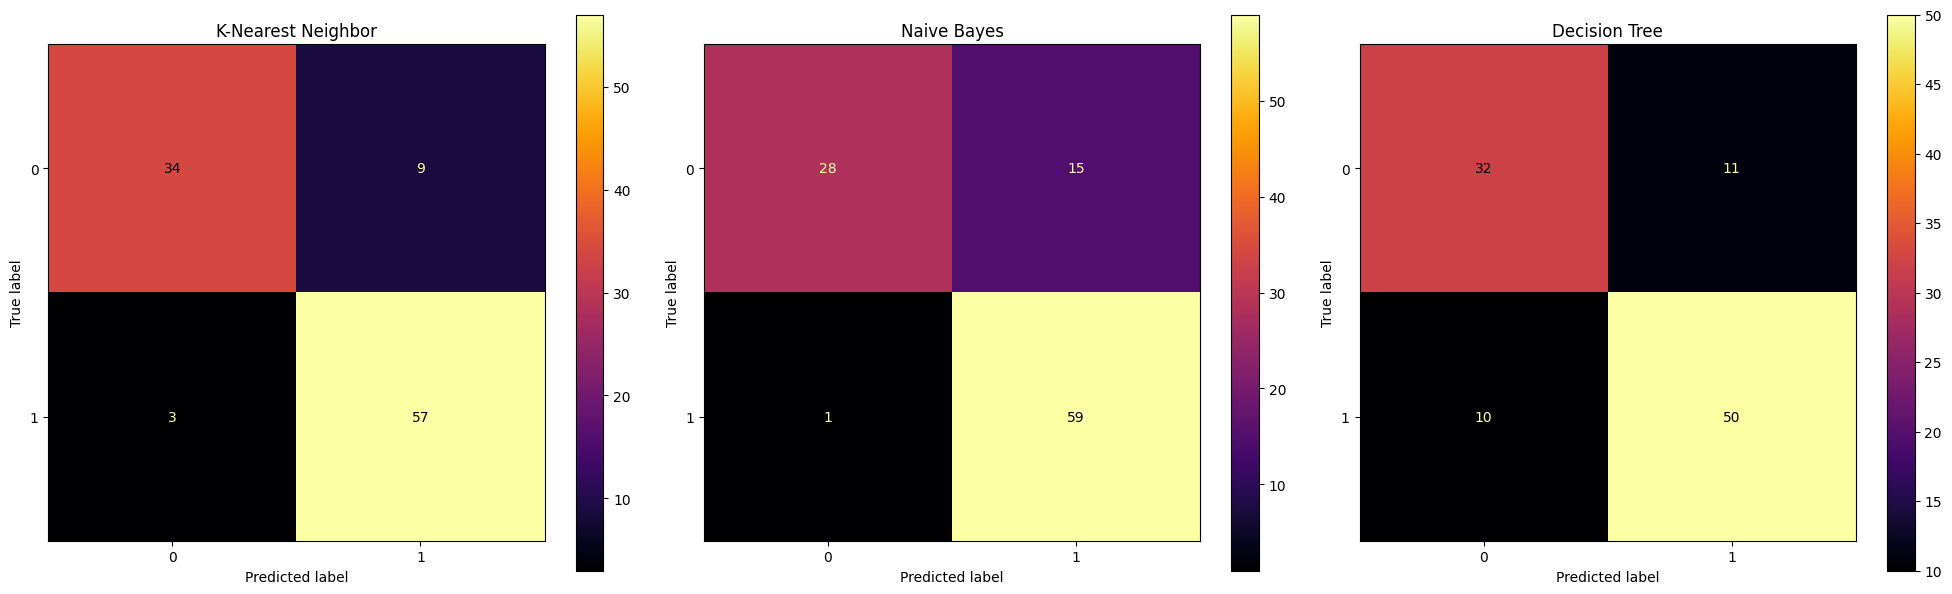

In [ ]:
models = [knn, gnb, dtc]

model_names = ['K-Nearest Neighbor','Naive Bayes', 'Decision Tree']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

for i, model in enumerate(models):
  y_pred = model.predict(x_test_norm)

  cm = confusion_matrix(y_test, y_pred)

  cm_display = ConfusionMatrixDisplay(cm).plot(ax=axes[i], cmap='inferno')

  cm_display.ax_.set_title(model_names[i])

plt.tight_layout()
plt.show()

Confusion matrix adalah alat evaluasi kinerja model klasifikasi yang menyajikan hasil prediksi model terhadap data uji dalam bentuk tabel. Di sini, kita memiliki tiga confusion matrix untuk tiga model yang berbeda: K-Nearest Neighbor (KNN), Gaussian Naive Bayes (GNB), dan Decision Tree Classifier (DTC).

1. **Confusion Matrix for K-Nearest Neighbor (KNN):**
   - Prediksi 0 yang benar (True Negative): 34
   - Prediksi 1 yang salah (False Positive): 9
   - Prediksi 0 yang salah (False Negative): 3
   - Prediksi 1 yang benar (True Positive): 57

2. **Confusion Matrix for Gaussian Naive Bayes (GNB):**
   - Prediksi 0 yang benar (True Negative): 28
   - Prediksi 1 yang salah (False Positive): 15
   - Prediksi 0 yang salah (False Negative): 1
   - Prediksi 1 yang benar (True Positive): 59

3. **Confusion Matrix for Decision Tree Classifier (DTC):**
   - Prediksi 0 yang benar (True Negative): 32
   - Prediksi 1 yang salah (False Positive): 11
   - Prediksi 0 yang salah (False Negative): 10
   - Prediksi 1 yang benar (True Positive): 50

Dari confusion matrix di atas, kita dapat membuat beberapa penilaian terhadap kinerja masing-masing model:
- Jumlah True Positive (TP) dan True Negative (TN) yang tinggi menunjukkan bahwa model secara akurat memprediksi kelas positif dan negatif.
- Jumlah False Positive (FP) dan False Negative (FN) yang rendah menunjukkan bahwa model menghasilkan sedikit kesalahan dalam memprediksi kelas.


####**Interpretasi Kurva ROC (Receiver Operating Characteristic)**

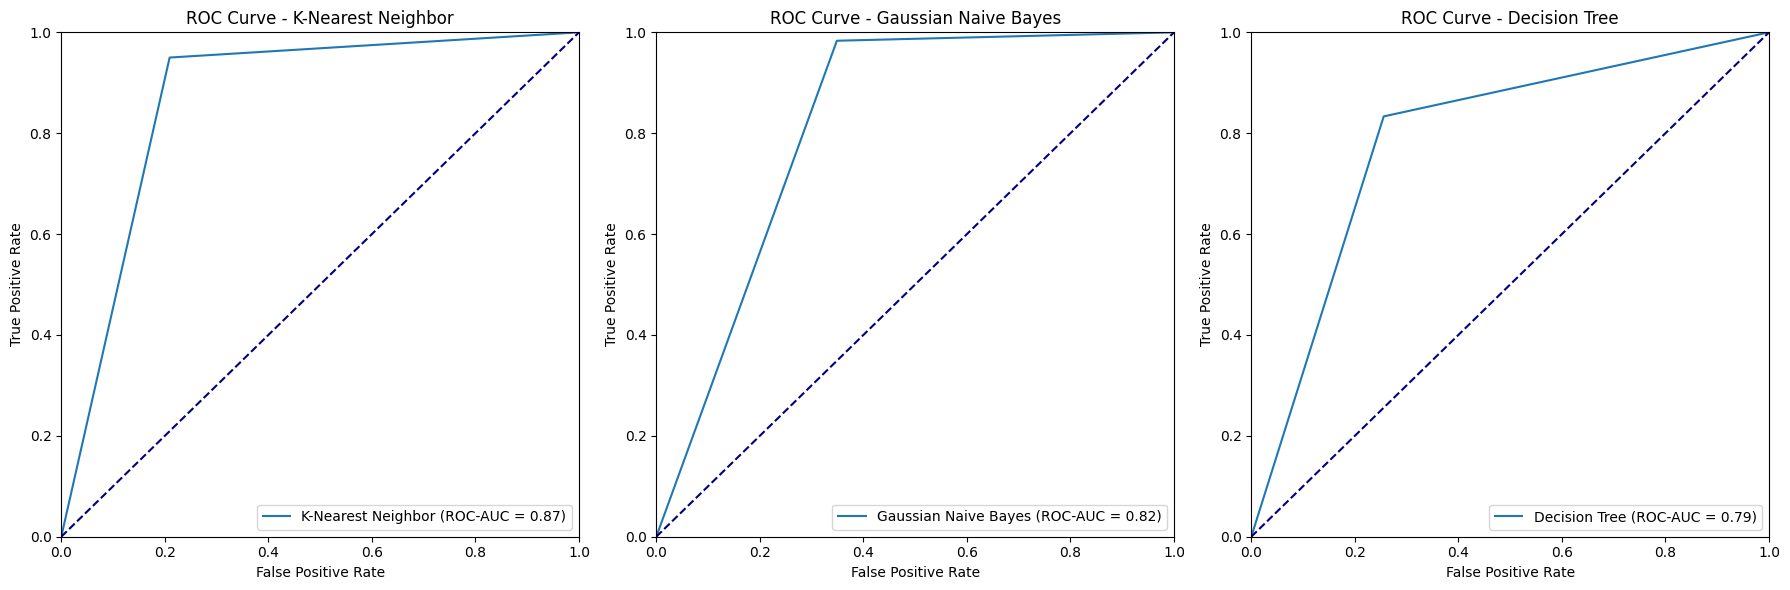

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

models = [knn, gnb, dtc]
model_names = ['K-Nearest Neighbor', 'Gaussian Naive Bayes', 'Decision Tree']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for model, name, ax in zip(models, model_names, axes):
  y_pred = model.predict(x_test_norm)

  fpr, tpr, _ = roc_curve(y_test, y_pred)

  roc_auc = roc_auc_score(y_test, y_pred)

  ax.plot(fpr, tpr, label=f'{name} (ROC-AUC = {roc_auc:.2f})')
  ax.plot([0, 1], [0,1], color='navy', linestyle='--')
  ax.set_xlim([0.0, 1.0])
  ax.set_ylim([0.0, 1.0])
  ax.set_xlabel("False Positive Rate")
  ax.set_ylabel("True Positive Rate")
  ax.set_title(f'ROC Curve - {name}')
  ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

**Kurva ROC (Receiver Operating Characteristic)** adalah grafik yang mengilustrasikan performa dari suatu model klasifikasi pada berbagai threshold cut-off. Pada sumbu x, kita memiliki nilai False Positive Rate (FPR), yang merupakan proporsi dari kelas negatif yang salah terklasifikasikan sebagai kelas positif. Sedangkan pada sumbu y, kita memiliki nilai True Positive Rate (TPR), yang merupakan proporsi dari kelas positif yang berhasil terklasifikasikan dengan benar.

**Area Under the ROC Curve (AUC-ROC)** adalah ukuran numerik dari seberapa baik model mampu memisahkan antara dua kelas. Nilai AUC-ROC berkisar antara 0 hingga 1, di mana nilai 1 menunjukkan bahwa model sempurna dalam memisahkan kelas positif dan negatif, sementara nilai 0.5 menunjukkan bahwa model memiliki kinerja yang sama dengan pengklasifikasi acak.

Dari interpretasi nilai AUC-ROC untuk masing-masing model:

1. **K-Nearest Neighbor (KNN)** memiliki AUC-ROC sebesar 0,87. Ini menunjukkan bahwa model KNN memiliki kemampuan yang sangat baik dalam membedakan antara kelas positif dan negatif. Dengan kata lain, model KNN memiliki tingkat True Positive Rate yang tinggi dan tingkat False Positive Rate yang rendah.

2. **Gaussian Naive Bayes (GNB)** memiliki AUC-ROC sebesar 0,82. Meskipun nilai ini sedikit lebih rendah dari KNN, masih menunjukkan bahwa model GNB memiliki kinerja yang baik dalam membedakan antara kelas positif dan negatif.

3. **Decision Tree (DTC)** memiliki AUC-ROC sebesar 0,79. Nilai ini sedikit lebih rendah dari KNN dan GNB, menunjukkan bahwa model DTC memiliki kinerja yang sedikit lebih rendah dalam membedakan antara kelas positif dan negatif.

Dengan demikian, berdasarkan nilai AUC-ROC, kita dapat menyimpulkan bahwa model KNN memiliki kinerja yang paling baik dalam memisahkan antara kelas positif dan negatif, diikuti oleh GNB, dan kemudian DTC. Ini menunjukkan bahwa dalam konteks ini, model KNN adalah yang paling optimal untuk tugas klasifikasi yang diberikan.

####**Hasil Akhir**

Berdasarkan hasil dari classification report dan confusion matrix, kita dapat membuat beberapa penilaian terhadap ketiga model:

1. **Gaussian Naive Bayes (GNB):**
   - Dari classification report, GNB memiliki nilai precision, recall, dan f1-score yang baik untuk kelas 0 dan 1, dengan nilai precision sebesar 0.97 untuk kelas 0 dan 0.80 untuk kelas 1.
   - Meskipun memiliki recall yang rendah untuk kelas 0 (0.65), GNB memiliki recall yang tinggi untuk kelas 1 (0.98), menunjukkan kemampuan model untuk mengidentifikasi sebagian besar contoh positif.
   - Dari confusion matrix, GNB memiliki jumlah False Positive (FP) dan False Negative (FN) yang rendah, yaitu 15 dan 1, secara berturut-turut.
   - Namun, nilai AUC-ROC untuk GNB adalah 0.82, yang merupakan yang terendah dari ketiga model.

2. **K-Nearest Neighbor (KNN):**
   - KNN memiliki nilai precision, recall, dan f1-score yang seimbang untuk kelas 0 dan 1, dengan nilai precision sebesar 0.92 untuk kelas 0 dan 0.86 untuk kelas 1.
   - Dari confusion matrix, KNN memiliki jumlah False Positive (FP) dan False Negative (FN) yang relatif rendah, yaitu 9 dan 3, secara berturut-turut.
   - Nilai AUC-ROC untuk KNN adalah 0.87, yang merupakan yang tertinggi dari ketiga model.

3. **Decision Tree Classifier (DTC):**
   - DTC memiliki nilai precision, recall, dan f1-score yang cukup baik, dengan nilai precision sebesar 0.76 untuk kelas 0 dan 0.82 untuk kelas 1.
   - Dari confusion matrix, DTC memiliki jumlah False Positive (FP) dan False Negative (FN) yang cukup seimbang, yaitu 11 dan 10, secara berturut-turut.
   - Nilai AUC-ROC untuk DTC adalah 0.79.

Berdasarkan penilaian dari beberapa metrik evaluasi dan matriks konfusi, secara umum, K-Nearest Neighbor (KNN) memiliki kinerja yang paling optimal dalam kasus ini, diikuti oleh Gaussian Naive Bayes (GNB) dan Decision Tree Classifier (DTC). Meskipun GNB memiliki precision yang tinggi, namun KNN menonjol dengan nilai AUC-ROC yang lebih tinggi dan jumlah False Positive (FP) dan False Negative (FN) yang lebih rendah. Oleh karena itu, KNN mungkin menjadi pilihan yang lebih baik untuk melakukan klasifikasi dalam kasus ini.

###**Review Process**

In [ ]:
from sklearn.model_selection import cross_val_score

# List of models
models = [knn, gnb, dtc]

# List to store cross-validation scores
cv_scores = []

# Perform cross-validation for each model
for model in models:
    scores = cross_val_score(model, x_train_norm, y_train, cv=5)
    cv_scores.append(scores)

# Calculate mean cross-validation score for each model
mean_cv_scores = [round(scores.mean(), 3) for scores in cv_scores]

# Display the mean cross-validation scores
print("Mean Cross-Validation Scores:")
for model_name, mean_score in zip(model_names, mean_cv_scores):
    print(f"{model_name}: {mean_score}")


Mean Cross-Validation Scores:
K-Nearest Neighbor: 0.917
Gaussian Naive Bayes: 0.82
Decision Tree: 0.866


Penilaian berdasarkan beberapa metrik evaluasi dan matriks konfusi menunjukkan bahwa K-Nearest Neighbor (KNN) memiliki kinerja yang paling optimal dalam kasus ini, diikuti oleh Gaussian Naive Bayes (GNB) dan Decision Tree Classifier (DTC). KNN menonjol dengan nilai AUC-ROC yang lebih tinggi dan jumlah False Positive (FP) dan False Negative (FN) yang lebih rendah. Meskipun GNB memiliki precision yang tinggi, namun KNN tetap menjadi pilihan yang lebih baik untuk melakukan klasifikasi dalam kasus ini karena konsistensi performa yang tinggi dan kemampuannya untuk meminimalkan kesalahan klasifikasi. Kaitannya dengan Mean Cross-Validation Scores yang telah diperoleh sebelumnya, nilai tertinggi dari KNN menegaskan bahwa algoritma ini memiliki performa yang stabil dan konsisten ketika diterapkan pada data yang tidak dikenal, sehingga menjadi pilihan yang lebih optimal dalam konteks ini.

###**Feature Selection**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Inisialisasi objek model untuk KNN, GNB, dan DTC
models = [knn, gnb, dtc]
model_names = ['K-Nearest Neighbor', 'Gaussian Naive Bayes', 'Decision Tree Classifier']

# Menentukan jumlah fitur terbaik yang ingin dipilih
k_best = 5  # Ubah sesuai kebutuhan

# Looping melalui setiap model
for model, name in zip(models, model_names):
    # Membuat objek selector fitur
    selector = SelectKBest(score_func=f_classif, k=k_best)

    # Melatih selector fitur pada data latih dan melakukan transformasi
    x_train_selected = selector.fit_transform(x_train_norm, y_train)

    # Mendapatkan nama fitur terpilih
    selected_features = x.columns[selector.get_support()]

    # Menampilkan nama fitur terpilih untuk setiap model
    print(f"Selected Features for {name}: {selected_features}")


Selected Features for K-Nearest Neighbor: Index(['STATUS MAHASISWA', 'IPS 1', 'IPS 4', 'IPS 5', 'IPK '], dtype='object')
Selected Features for Gaussian Naive Bayes: Index(['STATUS MAHASISWA', 'IPS 1', 'IPS 4', 'IPS 5', 'IPK '], dtype='object')
Selected Features for Decision Tree Classifier: Index(['STATUS MAHASISWA', 'IPS 1', 'IPS 4', 'IPS 5', 'IPK '], dtype='object')


Dalam hasil seleksi fitur yang telah dilakukan untuk ketiga model (K-Nearest Neighbor, Gaussian Naive Bayes, dan Decision Tree Classifier), terlihat bahwa fitur 'STATUS MAHASISWA', 'IPS 1', 'IPS 4', 'IPS 5', dan 'IPK' dipertahankan di antara fitur-fitur yang dipilih.

1. **STATUS MAHASISWA**: Fitur ini memungkinkan model untuk membedakan antara mahasiswa yang masih aktif belajar dan mereka yang sudah bekerja. Mahasiswa yang masih aktif belajar mungkin memiliki fokus yang lebih besar terhadap studi mereka dan lebih mungkin untuk lulus tepat waktu, sementara mereka yang sudah bekerja mungkin memiliki keterbatasan waktu yang dapat mempengaruhi kemampuan mereka untuk menyelesaikan studi tepat waktu. Dengan mempertimbangkan status mahasiswa, model dapat menyesuaikan prediksi kelulusan berdasarkan konteks individu dan faktor-faktor ini dapat memberikan wawasan tentang kemungkinan kelulusan tepat waktu.

2. **IPS 1, IPS 4, dan IPS 5**: IPS pada semester awal (IPS 1) dan semester-semester berikutnya (IPS 4 dan IPS 5) merupakan indikator langsung dari kemajuan akademik seorang mahasiswa selama masa studi mereka. Mahasiswa yang memiliki kinerja yang kuat pada semester awal dan mempertahankan atau meningkatkannya pada semester berikutnya lebih mungkin untuk lulus tepat waktu. Sebaliknya, penurunan kinerja pada semester krusial seperti IPS 4 dan IPS 5 mungkin mengindikasikan risiko kelulusan terlambat. Dengan mempertimbangkan IPS-IPS ini, model dapat mengidentifikasi pola kinerja akademik yang berkaitan dengan kelulusan tepat waktu atau terlambat.

3. **IPK**: IPK mencerminkan kinerja akademik keseluruhan seorang mahasiswa selama masa studi mereka. Mahasiswa dengan IPK yang tinggi cenderung memiliki kemungkinan kelulusan tepat waktu yang lebih besar karena konsistensi dalam kinerja akademik mereka. Sebaliknya, mahasiswa dengan IPK yang rendah mungkin memiliki risiko kelulusan terlambat. Dengan mempertimbangkan IPK, model dapat menilai keseluruhan kemajuan akademik mahasiswa dan memprediksi kemungkinan kelulusan tepat waktu.

Hasil seleksi fitur menunjukkan bahwa status mahasiswa, Indeks Prestasi Semester (IPS) pada semester awal (IPS 1) dan semester-semester berikutnya (IPS 4 dan IPS 5), serta Indeks Prestasi Kumulatif (IPK) merupakan faktor-faktor penting dalam memprediksi kelulusan mahasiswa. Dengan mempertimbangkan faktor-faktor ini, model dapat mengidentifikasi pola kinerja akademik yang berkaitan dengan kelulusan tepat waktu atau terlambat. Dengan demikian, pemahaman yang baik tentang faktor-faktor tersebut dapat membantu institusi pendidikan dalam mengembangkan strategi untuk meningkatkan tingkat kelulusan tepat waktu mahasiswa.

###**Tuning Hyperparameter**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Bagi data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Inisialisasi model KNN
knn = KNeighborsClassifier()

# Akurasi sebelum tuning
knn.fit(x_train, y_train)
y_pred_before_tuning = knn.predict(x_test)
accuracy_before_tuning = accuracy_score(y_test, y_pred_before_tuning)
print("Accuracy Before Hyperparameter Tuning:", accuracy_before_tuning)

# Menentukan hyperparameter yang akan di-tune dan rentang nilainya
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

# Inisialisasi objek GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Melakukan tuning hyperparameter menggunakan data training
grid_search.fit(x_train, y_train)

# Menampilkan hyperparameter terbaik
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluasi model dengan hyperparameter terbaik
best_knn = grid_search.best_estimator_
y_pred_after_tuning = best_knn.predict(x_test)
accuracy_after_tuning = accuracy_score(y_test, y_pred_after_tuning)
print("Accuracy with Best Hyperparameters:", accuracy_after_tuning)


Accuracy Before Hyperparameter Tuning: 0.8695652173913043
Best Hyperparameters: {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Accuracy with Best Hyperparameters: 0.8695652173913043


Dalam kasus ini, kita memiliki model K-Nearest Neighbors (KNN) yang sebelumnya sudah memiliki akurasi sebesar 86.96% sebelum dilakukan penyetelan hyperparameter. Kemudian, digunakan GridSearchCV untuk mencari kombinasi hyperparameter terbaik yang dapat meningkatkan performa model.

Hasil dari penyetelan hyperparameter menunjukkan bahwa parameter terbaik yang ditemukan adalah dengan menggunakan 5 tetangga terdekat, metrik jarak Euclidean (p=2), dan metode pembobotan tetangga yang seragam (uniform). Meskipun demikian, saat menggunakan hyperparameter terbaik ini untuk mengevaluasi model pada data uji, akurasi yang diperoleh tetap sama dengan sebelumnya, yaitu sekitar 86.96%.

Dengan demikian, kesimpulannya adalah bahwa penyetelan hyperparameter tidak menghasilkan peningkatan yang signifikan dalam performa model KNN dalam kasus ini. Ini bisa disebabkan oleh fakta bahwa model sudah cukup baik secara default atau karena dataset yang digunakan mungkin tidak terlalu sensitif terhadap perubahan pada hyperparameter tertentu.

###**Determine Next Steps**

Model K-Nearest Neighbors (KNN) telah terbukti menjadi pilihan terbaik dalam memprediksi status kelulusan mahasiswa, dengan akurasi yang tinggi dan nilai AUC-ROC yang baik. Faktor-faktor penting seperti status mahasiswa, Indeks Prestasi Semester (IPS), dan Indeks Prestasi Kumulatif (IPK) telah diidentifikasi sebagai variabel yang paling memengaruhi kelulusan mahasiswa. Meskipun penyetelan hyperparameter dilakukan, tidak ada peningkatan signifikan dalam kinerja model KNN, menunjukkan bahwa konfigurasi defaultnya sudah cukup baik.

Dengan demikian, dapat disimpulkan bahwa model yang telah dibangun memenuhi kebutuhan dan tujuan proyek untuk menganalisis pola kelulusan mahasiswa. Langkah selanjutnya adalah memastikan implementasi model ini mengikuti praktik terbaik dalam deployment di lingkungan produksi untuk memastikan konsistensi dan kehandalan dalam aplikasi praktisnya.